提取第一行第一列中的内容，区分数字部分和文字部分，将数字部分暂存在变量Voltage中。
同样的提取第一行第二列和第一行第三列的数字部分，分别存储在变量multiple和rpm中。
删除.mat文件中的前两行，将每一行的后三列分别填充变量Voltage、multiple和rpm中的变量。

In [ ]:
import os
import re
import pandas as pd

# 设定.csv文件所在的目录
csv_directory = 'PI_data_16-20_csv'

# 正则表达式用于提取文件名中的数字部分
def extract_numbers_from_filename(filename):
    numbers = re.findall(r'\d+\.?\d*', filename)
    return [float(num) for num in numbers] if numbers else [None] * 4  # 返回4个数字

# 获取.csv文件
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# 批量处理.csv文件
for csv_file in csv_files:
    # 提取文件名中的数字部分
    # 假设文件名包含数字，按照顺序表示 Voltage, multiple, k, rpm
    numbers = extract_numbers_from_filename(csv_file)
    if len(numbers) >= 4:
        Voltage, multiple, k, rpm = numbers[:4]  # 获取前四个数值
    else:
        print(f"File name {csv_file} does not contain enough numbers.")
        continue
        
    # 读取.csv文件
    file_path = os.path.join(csv_directory, csv_file)
    df = pd.read_csv(file_path,header=1)
    
    # 删除第一行
    df = df.drop([0])
    df = df.iloc[:, 0:3]
    
    # 填充
    #df['Voltage'] = Voltage
    #df['multiple'] = multiple
    #df['k'] = k
    #df['rpm'] = rpm

    # 将四个变量填充至前四列
    df.insert(loc=0,column='Voltage',value=Voltage)
    df.insert(loc=1,column='multiple',value=multiple)
    df.insert(loc=2,column='k',value=k)
    df.insert(loc=3,column='rpm',value=rpm)
    
    # 保存修改后的.csv文件
    csv_modified_file = file_path.replace('.csv', '_modified.csv')
    df.to_csv(csv_modified_file, index=False)
    
    print(f"Processed {csv_file} -> {csv_modified_file}")

In [ ]:
import pandas as pd
import os

# 设定包含csv文件的目录路径
directory = 'modified'  # 请替换为存放CSV文件的路径

# 创建一个空的DataFrame用于存放汇总后的数据
all_data = pd.DataFrame()

# 遍历目录中的所有CSV文件
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        # 读取每个CSV文件
        df = pd.read_csv(file_path)
        # 将数据追加到all_data中
        all_data = pd.concat([all_data, df], ignore_index=True)

# 将汇总后的数据保存到新的CSV文件中
all_data.to_csv('all_data.csv', index=False)

# 打印完成提示
print("所有CSV文件数据汇总完成并保存为'all_data.csv'")

In [3]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('all_data.csv')

# 删除最后一列中值为0的行
df_cleaned = df[df.iloc[:, -1] != 0]

# 保存到一个新的 CSV 文件中
df_cleaned.to_csv('cleaned_file_0.csv', index=False)

In [17]:
#拼接新增数据的尝试(最终手动调整列的顺序并复制黏贴完成)

import pandas as pd

# 读取两个CSV文件
df1 = pd.read_csv('all_data.csv')
df2 = pd.read_csv('PI_data_6-15_2.csv')

df1_T = df1.T
df2_T = df2.T

# 拼接新增数据
df_merged = pd.concat([df1_T, df2_T], axis=1)  # axis=1表示横向拼接（列方向）
 
# 保存合并后的CSV文件
df_merged.to_csv('merged_file.csv', index=False)

# 读取 CSV 文件
df = pd.read_csv('merged_file.csv')

# 删除最后一列中值为0的行
df_cleaned = df[df.iloc[:, -1] != 0]

# 保存到一个新的 CSV 文件中
df_cleaned.to_csv('cleaned_file_6-20.csv', index=False)

C:\Users\JiFan\AppData\Local\Temp\ipykernel_21964\3001354723.py:16: DtypeWarning: Columns (61555) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_file.csv')


In [3]:
##KNN回归
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error

# 1. 加载CSV数据
data = pd.read_csv('cleaned_file.csv')

# 2. 假设特征在data的前几列，标签在最后一列
X = data.iloc[:, :-1].values  # 输入特征
y = data.iloc[:, -1].values   # 输出标签

# 3. 数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#5. 构建knn回归模型
n_neighbors = 5
knn = neighbors.KNeighborsRegressor(n_neighbors, weights="distance")
    
#6.训练模型/7.模型预测
knn_regressor = knn.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
    
# 8. 评估模型 (使用均方误差)
mse = mean_squared_error(y_test, y_pred)
print(f"均方误差: {mse}")

均方误差: 0.002095151115535863


In [13]:
#循环结构手动枚举多次，得大多数情况下K值取3，5时（去除偶数4）方差最小.

#KNN回归
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error

# 1. 加载CSV数据
data = pd.read_csv('cleaned_file.csv')

# 2. 假设特征在data的前几列，标签在最后一列
X = data.iloc[:, :-1].values  # 输入特征
y = data.iloc[:, -1].values   # 输出标签

# 3. 数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


for K in range(2,7):
    knn = neighbors.KNeighborsRegressor(K, weights="distance")
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"均方误差: {mse}")


均方误差: 0.0021190632319493673
均方误差: 0.0020288166310327097
均方误差: 0.001966789001423997
均方误差: 0.0019530088320664715
均方误差: 0.001971348904647464


均方误差: 0.002617799232065765
均方误差: 0.0024665072006174473
均方误差: 0.0024674485884989897
均方误差: 0.002487814495256512
均方误差: 0.0025050561557194676
均方误差: 0.0025007225629478038
均方误差: 0.0025163534108516225


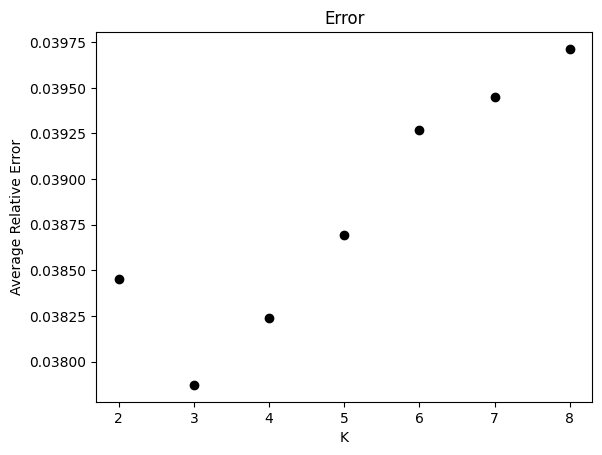

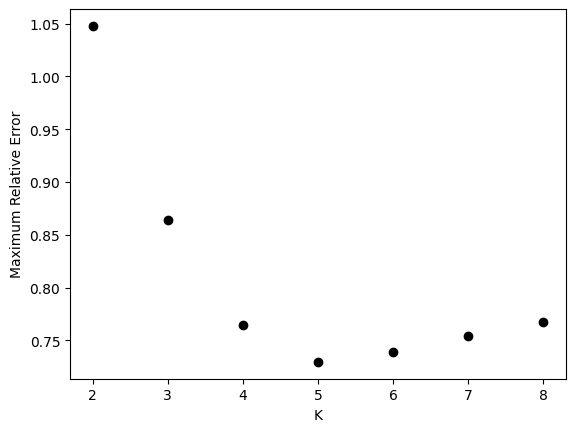

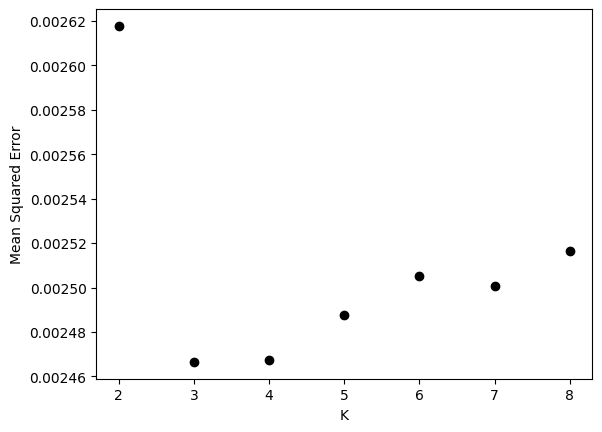

In [66]:
#可忽略
#对于随机训练集和测试集的划分，输出随K值变化的回归结果变化散点图

#KNN回归
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. 加载CSV数据
data = pd.read_csv('cleaned_file.csv')

# 2. 假设特征在data的前几列，标签在最后一列
X = data.iloc[:, :-1].values  # 输入特征
y = data.iloc[:, -1].values   # 输出标签

# 3. 数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

m_d = []
max_d = []
min_d = []
mse_d = []
for K in range(2,9):
    knn = neighbors.KNeighborsRegressor(K, weights="distance")
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"均方误差: {mse}")
    difference = []
    mean_difference = 0
    for i in range(len(y_test)):
        difference.append(abs(y_pred[i]-y_test[i])/y_test[i])
        mean_difference += (abs(y_pred[i]-y_test[i])/y_test[i])
        
    mean_difference /= len(y_test)
    m_d.append(mean_difference)

    max_d.append(max(difference))
    min_d.append(min(difference))

    mse_d.append(mse) 

plt.scatter(range(2,9), m_d, color="black", label="black")
plt.xlabel('K')
plt.ylabel("Average Relative Error")
plt.title("Error")
#plt.legend()
plt.show()

plt.scatter(range(2,9), max_d, color="black", label="black")
plt.xlabel('K')
plt.ylabel("Maximum Relative Error")
#plt.title("max_difference")
#plt.legend()
plt.show()

plt.scatter(range(2,9), mse_d, color="black", label="black")
plt.xlabel('K')
plt.ylabel("Mean Squared Error")
#plt.legend()
plt.show()


均方误差: 0.002487259193435571
均方误差: 0.002131344375878505
均方误差: 0.0022603240533434423
均方误差: 0.002104720516538432
均方误差: 0.0020538329313692255
均方误差: 0.0021482172751397786
均方误差: 0.0021885443982508925
均方误差: 0.002094810114210383
均方误差: 0.002074310337829123
均方误差: 0.0022552668544581337
均方误差: 0.002360046297183774
均方误差: 0.0023911078351605774
均方误差: 0.002302121287402117
均方误差: 0.0020411268985033788
均方误差: 0.002043174135337984
均方误差: 0.0022651229407077518
均方误差: 0.0021229155940660997
均方误差: 0.0023199678999720912
均方误差: 0.002017347828958646
均方误差: 0.0020389551022757992
均方误差: 0.00215548999319408
均方误差: 0.0022763430785486104
均方误差: 0.0019670851904438364
均方误差: 0.002321016563985519
均方误差: 0.002136132160667978
均方误差: 0.0022423326051161825
均方误差: 0.00204531408593029
均方误差: 0.002171014947959368
均方误差: 0.0021401693032805534
均方误差: 0.002078178903362055
均方误差: 0.0020379375258922604
均方误差: 0.0020886070233449663
均方误差: 0.002367438312039223
均方误差: 0.002217711549445852
均方误差: 0.0022293404360428037
均方误差: 0.0022660774164235445
均方误差: 0.002

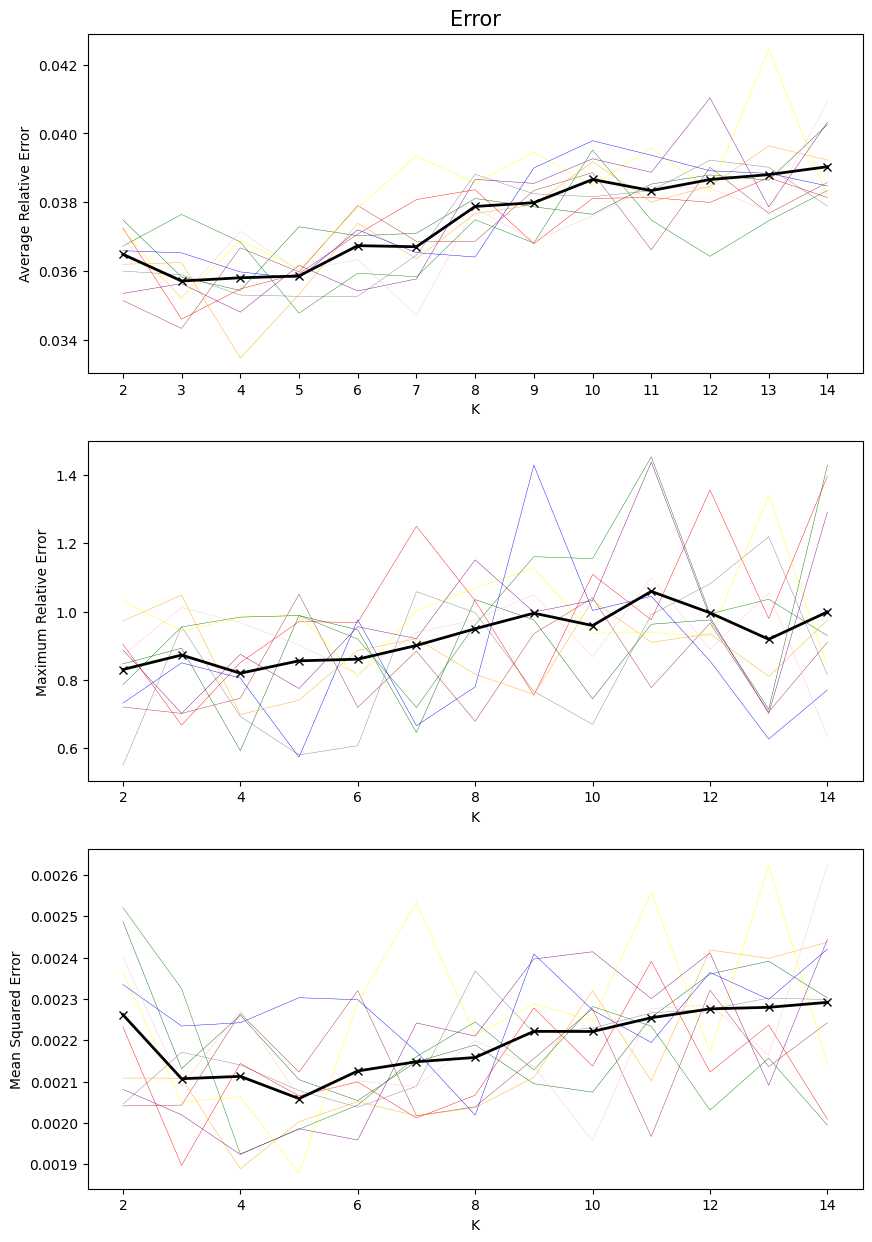

In [16]:
#对于不同训练集和测试集的划分，比较回归结果

#KNN回归
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 1. 加载CSV数据
data = pd.read_csv('cleaned_file.csv')

# 2. 假设特征在data的前几列，标签在最后一列
X = data.iloc[:, :-1].values  # 输入特征
y = data.iloc[:, -1].values   # 输出标签

# 3. 数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

m_d = []
max_d = []
mse_d = []
m_d_sum = max_d_sum = mse_d_sum = list(np.zeros(13))
plt.figure(figsize=(10,15))
for i,color in enumerate(["darkgreen","brown","grey","red","orange","yellow","green","blue","purple","pink"]):
    for K in range(2,15):
        # 3. 数据分割为训练集和测试集
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        knn = neighbors.KNeighborsRegressor(K, weights="distance")
        y_pred = knn.fit(X_train, y_train).predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f"均方误差: {mse}")
        difference = []
        mean_difference = 0
        for i in range(len(y_test)):
            difference.append(abs(y_pred[i]-y_test[i])/y_test[i])
            mean_difference += (abs(y_pred[i]-y_test[i])/y_test[i])
            
        mean_difference /= len(y_test)
        m_d.append(mean_difference)   

        max_d.append(max(difference))

        mse_d.append(mse) 

    #储存数据待计算该类误差平均值
    m_d_sum = np.add(m_d, m_d_sum)
    max_d_sum = np.add(max_d, max_d_sum)
    mse_d_sum = np.add(mse_d, mse_d_sum)
    

    plt.subplot(3, 1, 1)
    plt.plot(range(2,15), m_d, color=color, linewidth=0.3)
    plt.xticks(list(range(2,15)))
    plt.xlabel('K')
    plt.ylabel("Average Relative Error")
    plt.title("Error",fontsize=15)
    #plt.legend()
    #plt.show()

    plt.subplot(3, 1, 2)
    plt.plot(range(2,15), max_d, color=color, linewidth=0.3)
    plt.xlabel('K')
    plt.ylabel("Maximum Relative Error")
    #plt.title("max_difference")
    #plt.legend()
    #plt.show()

    plt.subplot(3, 1, 3)
    plt.plot(range(2,15), mse_d, color=color, linewidth=0.3)
    plt.xlabel('K')
    plt.ylabel("Mean Squared Error")
    #plt.legend()
    #plt.show()

    m_d = []
    max_d = []
    mse_d = []

#在各误差图表中添加平均值
print(m_d_sum)
m_d = [x / 10 for x in m_d_sum]
max_d = [x / 10 for x in max_d_sum]
mse_d = [x / 10 for x in mse_d_sum]
print(m_d)

plt.subplot(3, 1, 1)
plt.plot(range(2,15), m_d, marker='x', linewidth=2, color='black')
plt.xticks(list(range(2,15)))
plt.xlabel('K')
plt.ylabel("Average Relative Error")
plt.title("Error",fontsize=15)
#plt.legend()
#plt.show()

plt.subplot(3, 1, 2)
plt.plot(range(2,15), max_d, marker='x', linewidth=2, color='black')
plt.xlabel('K')
plt.ylabel("Maximum Relative Error")
#plt.title("max_difference")
#plt.legend()
#plt.show()

plt.subplot(3, 1, 3)
plt.plot(range(2,15), mse_d, marker='x', linewidth=2, color='black')
plt.xlabel('K')
plt.ylabel("Mean Squared Error")
#plt.legend()
#plt.show()


plt.show()


均方误差: 0.002116551990283535
均方误差: 0.0025119783461366608
均方误差: 0.0021976593549902067
均方误差: 0.0022724558340125743
均方误差: 0.0020395355540457063
均方误差: 0.002192165837551383
均方误差: 0.002141933415849173
均方误差: 0.0022822747191334016
均方误差: 0.0019996928755306436
均方误差: 0.0021578916027998113
均方误差: 0.0022139505551210044
均方误差: 0.0022924715684411985
均方误差: 0.0023087145837429714
均方误差: 0.002141761091106338
均方误差: 0.0021795055610156623
均方误差: 0.0021360733379364233
均方误差: 0.0019074777926686322
均方误差: 0.00204206453416066
均方误差: 0.002266104550611929
均方误差: 0.002001710114460848
均方误差: 0.002345877210456698
均方误差: 0.0021748410722749294
均方误差: 0.002112470640643861
均方误差: 0.0021083719712394256
均方误差: 0.0021786301896336555
均方误差: 0.0021495729832049066
均方误差: 0.0021827689785280996
均方误差: 0.002109680494303086
均方误差: 0.002051736626886778
均方误差: 0.0020917784020900577
均方误差: 0.00213299790079127
均方误差: 0.0022070806596603595
均方误差: 0.002253626428206974
均方误差: 0.0019336576323811298
均方误差: 0.0024923208525509757
均方误差: 0.0022635455762709472
均方误差: 0

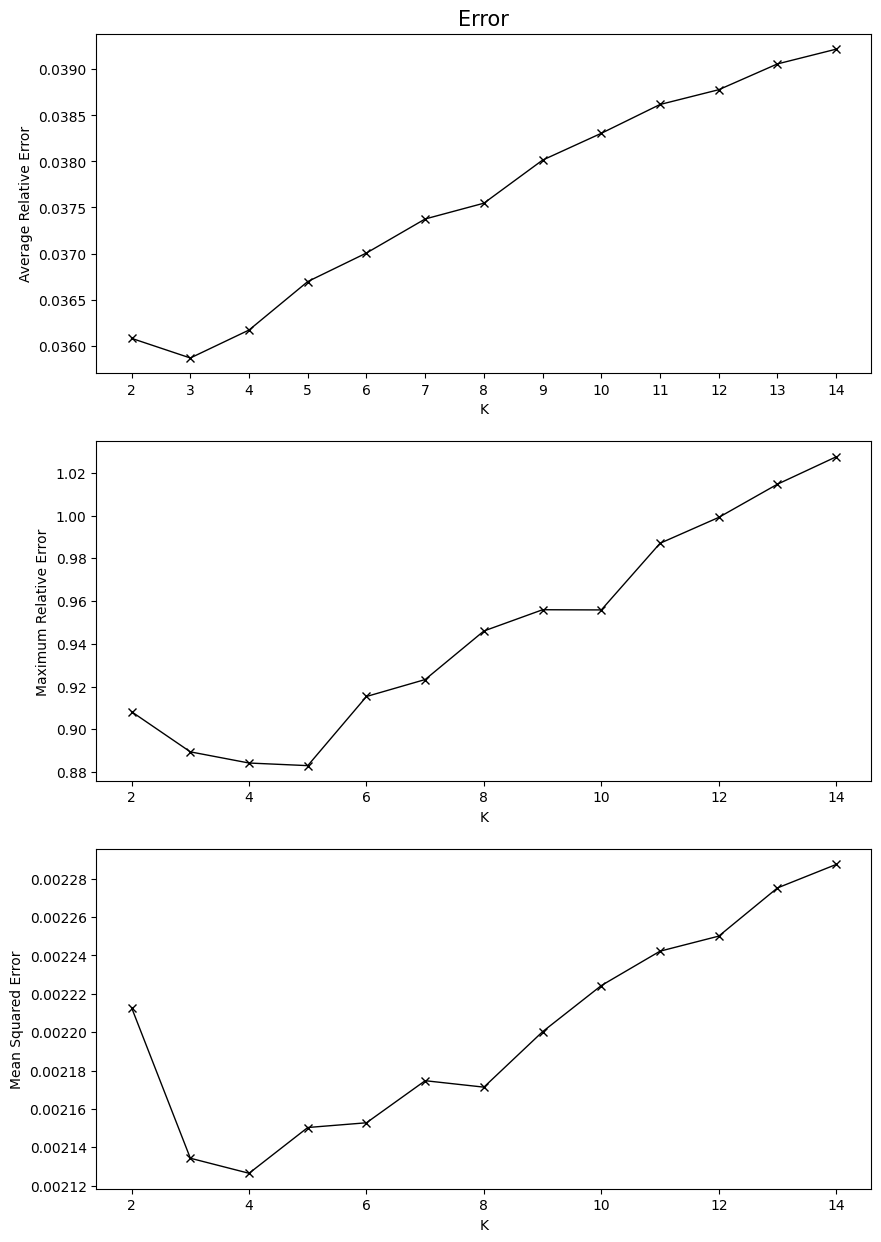

In [19]:
#对于1000次不同训练集和测试集的划分，输出平均回归结果

#KNN回归
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 1. 加载CSV数据
data = pd.read_csv('cleaned_file.csv')

# 2. 假设特征在data的前几列，标签在最后一列
X = data.iloc[:, :-1].values  # 输入特征
y = data.iloc[:, -1].values   # 输出标签

# 3. 数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

m_d = []
max_d = []
mse_d = []
m_d_sum = max_d_sum = mse_d_sum = list(np.zeros(13))
plt.figure(figsize=(10,15))
for i in range(1000):
    for K in range(2,15):
        # 3. 数据分割为训练集和测试集
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        knn = neighbors.KNeighborsRegressor(K, weights="distance")
        y_pred = knn.fit(X_train, y_train).predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f"均方误差: {mse}")
        difference = []
        mean_difference = 0
        for i in range(len(y_test)):
            difference.append(abs(y_pred[i]-y_test[i])/y_test[i])
            mean_difference += (abs(y_pred[i]-y_test[i])/y_test[i])
            
        mean_difference /= len(y_test)
        m_d.append(mean_difference)   

        max_d.append(max(difference))

        mse_d.append(mse) 

    #储存数据待计算该类误差平均值
    m_d_sum = np.add(m_d, m_d_sum)
    max_d_sum = np.add(max_d, max_d_sum)
    mse_d_sum = np.add(mse_d, mse_d_sum)

    m_d = []
    max_d = []
    mse_d = []
    

#在各误差图表中添加平均值
print(m_d_sum)
m_d = [x / 1000 for x in m_d_sum]
max_d = [x / 1000 for x in max_d_sum]
mse_d = [x / 1000 for x in mse_d_sum]
print(m_d)

plt.subplot(3, 1, 1)
plt.plot(range(2,15), m_d, marker='x', linewidth=1, color='black')
plt.xticks(list(range(2,15)))
plt.xlabel('K')
plt.ylabel("Average Relative Error")
plt.title("Error",fontsize=15)
#plt.legend()
#plt.show()

plt.subplot(3, 1, 2)
plt.plot(range(2,15), max_d, marker='x', linewidth=1, color='black')
plt.xlabel('K')
plt.ylabel("Maximum Relative Error")
#plt.title("max_difference")
#plt.legend()
#plt.show()

plt.subplot(3, 1, 3)
plt.plot(range(2,15), mse_d, marker='x', linewidth=1, color='black')
plt.xlabel('K')
plt.ylabel("Mean Squared Error")
#plt.legend()
#plt.show()


plt.show()


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
X_test

array([[7.2000e+02, 1.6000e+01, 5.0000e+00, 6.0000e+01, 3.5000e+01,
        2.5119e-01],
       [7.0000e+02, 2.0000e+01, 5.0000e+00, 7.0000e+01, 2.5000e+01,
        5.0119e-02],
       [7.6000e+02, 2.0000e+01, 5.0000e+00, 7.0000e+01, 5.0000e+00,
        3.1623e+00],
       ...,
       [7.1000e+02, 1.6000e+01, 5.0000e+00, 6.0000e+01, 3.0000e+01,
        3.1623e+00],
       [7.0000e+02, 1.7000e+01, 5.0000e+00, 6.0000e+01, 5.5000e+01,
        7.9433e-02],
       [7.4000e+02, 2.0000e+01, 5.0000e+00, 7.0000e+01, 1.5000e+01,
        1.2589e-02]])

In [51]:
y_pred

array([0.53787936, 0.6906823 , 0.86834334, ..., 0.62858564, 0.37899993,
       0.70249403])

In [21]:
#寻找mutiple取[1,20]时，模型预测stop duration最小的情况对应其他参数大小

import numpy as np
import pandas as pd

# 生成随机数组的函数
def generate_array(n,mult): #mult变量为multiple的值
    # 第一列 [600, 800] 范围内的随机值
    col1 = np.random.uniform(650, 780, n)
    col2 = np.full(n, mult) #multiple的值
    col3 = np.full(n, 5) 
    # 第四列 [50, 70] 范围内的随机值
    col4 = np.random.uniform(60, 70, n)
    
    # 第五列 [5, 200] 范围内的随机值
    col5 = np.random.uniform(5, 200, n)
    
    # 第六列 [0, 1] 范围内的随机值
    col6 = np.random.uniform(0, 1, n)
    
    # 将所有列拼接为一个数组
    array = np.column_stack((col1, col2, col3, col4, col5, col6))
    
    return array

# 生成 n 行数组
n = 10  # 示例行数
for mult in range(1,21):
    result = generate_array(n, mult) #生成不同mult对应的n行数组
    #result_df = pd.DataFrame(result)
    #result_df.to_excel(f"result{mult}.xlsx",index=False,header=True)
    
    #用训练好的knn回归模型预测stop_duration值
    z = knn_regressor.predict(result) 
    print(z)
    #输出stop_duration值最小的行对应的其他参数
    print("multiple =",mult,":",result[np.argmin(z)]) 


[0.707296   0.57059501 0.95375327 0.74690481 0.62586    0.81333493
 0.62841119 0.87351501 0.77252849 0.58724502]
multiple = 1 : [7.64673554e+02 1.00000000e+00 5.00000000e+00 6.43299495e+01
 6.19335558e+01 1.93339226e-01]
[0.41226    0.46430998 0.772305   0.80735485 0.593005   0.7072992
 0.672235   0.78635    0.9227952  0.81316055]
multiple = 2 : [7.70128974e+02 2.00000000e+00 5.00000000e+00 6.91199851e+01
 1.88150970e+02 5.18969521e-01]
[0.78699074 0.79545    0.49154    0.78404498 0.86406    0.821055
 0.49473476 0.707297   0.92618439 0.51494999]
multiple = 3 : [7.57142199e+02 3.00000000e+00 5.00000000e+00 6.51902782e+01
 1.82943661e+02 5.93968125e-01]
[0.80067519 0.388255   0.9598848  0.88634488 0.98430144 0.75460404
 0.80968473 0.85865499 0.87725033 0.72861497]
multiple = 4 : [7.77268222e+02 4.00000000e+00 5.00000000e+00 6.75561949e+01
 9.87598510e+01 5.41441844e-01]
[0.63343    0.80067913 0.88921379 0.52944496 0.90662999 0.68288054
 0.90741609 0.87351501 0.67528208 0.59411999]
multip

In [22]:
##同上，生成excel版

#寻找mutiple取[1,20]时，模型预测stop duration最小的情况对应其他参数大小

import numpy as np
import pandas as pd

# 生成随机数组的函数
def generate_array(n,mult): #mult变量为multiple的值
    # 第一列 [600, 800] 范围内的随机值
    col1 = np.random.uniform(650, 780, n)
    col2 = np.full(n, mult) #multiple的值
    col3 = np.full(n, 5) 
    # 第四列 [50, 70] 范围内的随机值
    col4 = np.random.uniform(60, 70, n)
    
    # 第五列 [5, 200] 范围内的随机值
    col5 = np.random.uniform(5, 200, n)
    
    # 第六列 [0, 1] 范围内的随机值
    col6 = np.random.uniform(0, 1, n)
    
    # 将所有列拼接为一个数组
    array = np.column_stack((col1, col2, col3, col4, col5, col6))
    
    return array

# 生成 n 行数组
n = 1000000  # 示例行数
multiple_data = {}
for mult in range(1,21):
    result = generate_array(n, mult) #生成不同mult对应的n行数组

    #用训练好的knn回归模型预测stop_duration值
    z = knn_regressor.predict(result) 

    #将stop_duration值最小的行对应的其他参数加入字典
    multiple_data[str(mult)]=list(result[np.argmin(z)])+[min(z)]


multiple_data_df = pd.DataFrame(multiple_data)

multiple_data_df_t = multiple_data_df.T
multiple_data_df_t.columns = ["Voltage","multiple","k","rpm","P","I","Stop Duration"]
multiple_data_df_t.to_excel("multiple_excel.xlsx",index=False,header=True)


In [16]:
#!!！验证用KNNRegressor输出的最小值唯一

#寻找multiple取[1,20]时，模型预测stop duration最小的情况对应其他参数大小

import numpy as np
import pandas as pd

# 生成随机数组的函数
def generate_array(n,mult): #mult变量为multiple的值
    # 第一列 [600, 800] 范围内的随机值
    col1 = np.random.uniform(650, 780, n)
    col2 = np.full(n, mult) #multiple的值
    col3 = np.full(n, 5) 
    # 第四列 [50, 70] 范围内的随机值
    col4 = np.random.uniform(60, 70, n)
    
    # 第五列 [5, 200] 范围内的随机值
    col5 = np.random.uniform(5, 200, n)
    
    # 第六列 [0, 1] 范围内的随机值
    col6 = np.random.uniform(0, 1, n)
    
    # 将所有列拼接为一个数组
    array = np.column_stack((col1, col2, col3, col4, col5, col6))
    
    return array

# 生成 n 行数组
n = 10000000  # 示例行数
multiple_data = {}

mult=2
result = generate_array(n, mult) #生成不同mult对应的n行数组

    #用训练好的knn回归模型预测stop_duration值
z = knn_regressor.predict(result) 

    #将stop_duration值最小的行对应的其他参数加入字典
a = np.where(z == min(z))

print(a)

#multiple_data_df = pd.DataFrame(multiple_data)

#multiple_data_df_t = multiple_data_df.T
#multiple_data_df_t.columns = ["Voltage","multiple","k","rpm","P","I"]
#multiple_data_df_t.to_excel("multiple_excel.xlsx",index=False,header=True)


(array([3496438], dtype=int64),)


In [ ]:
V = result[:,0]
rpm = result[:,3]
P = result[:,4]
I = result[:,5]

In [5]:
z = knn_regressor.predict(result)

In [6]:
print(z)

[0.91141009 0.8594295  0.807425   ... 0.36709052 0.69871208 0.91166501]


In [1]:
#KNN回归_参数优化

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# 1. 加载CSV数据
data = pd.read_csv('cleaned_file.csv')

# 2. 假设特征在data的前几列，标签在最后一列
X = data.iloc[:, :-1].values  # 输入特征
y = data.iloc[:, -1].values   # 输出标签

# 3. 数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#4. 定义参数网格
param_grid = {'n_neighbors': range(1,10), 'weights': ["uniform","distance"]}
 
#5. 构建knn回归模型
knn_model = neighbors.KNeighborsRegressor()
 
# 创建GridSearchCV实例
grid_search = GridSearchCV(knn_model, param_grid)
 
# 训练模型
grid_search.fit(X_train, y_train)
 
# 输出最佳参数组合
print(grid_search.best_params_)
 
# 输出最佳结果（拟合分数）
print(grid_search.best_score_)
 
# 使用最佳参数组合的模型
best_model = grid_search.best_estimator_
print(best_model)
y_pred = best_model.fit(X_train, y_train).predict(X_test)

#输出均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"均方误差: {mse}")


{'n_neighbors': 4, 'weights': 'distance'}
0.9246644385245867
KNeighborsRegressor(n_neighbors=4, weights='distance')
均方误差: 0.002071017287916904


[0.25098314 0.26186281 0.24785853 ... 0.97737663 0.99474748 0.93648427]


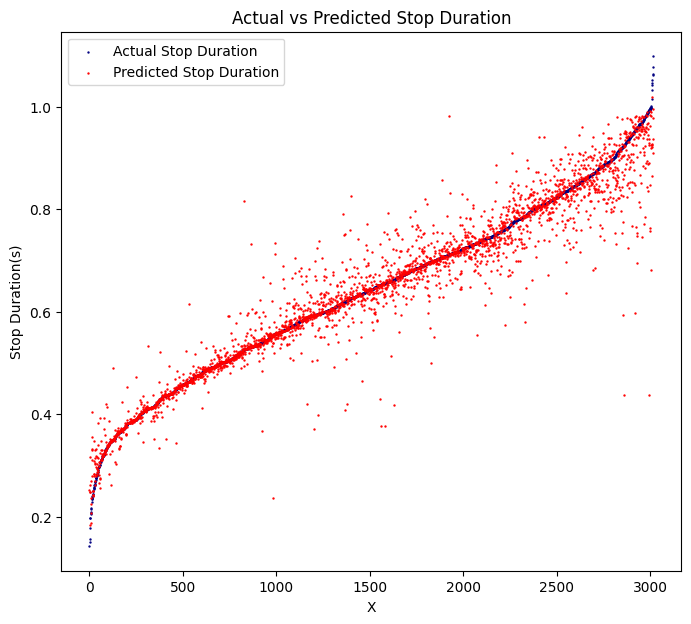

In [8]:
#作预测值和实际值的比较图

import matplotlib.pyplot as plt
import pandas as pd

#Rearranged_y_test = sorted(y_test)

#Rearranged_y_pred = 

y_index = {'ytest':y_test,'ypred':y_pred}
df_y_index = pd.DataFrame(y_index)

df_sort_ytest = df_y_index.sort_values(by='ytest')  #按照y_test大小排序

Rearranged_y_test = df_sort_ytest.iloc[:, 0].values   # 输出排序后的列表
Rearranged_y_pred = df_sort_ytest.iloc[:, 1].values

print(Rearranged_y_pred)

#plt.scatter(range(len(y_test)), y_test, color='black', label='Actual Values')
#plt.scatter(range(len(y_test)), y_pred, color='blue', label='Predicted Values')

plt.figure(figsize=(8,7))
plt.scatter(range(len(y_test)), Rearranged_y_test, color='navy', label='Actual Stop Duration',s=0.5)
plt.scatter(range(len(y_test)), Rearranged_y_pred, color='red', label='Predicted Stop Duration',s=0.5)
#plt.plot(range(1,len(y_test)+1), y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('Stop Duration(s)')
plt.title('Actual vs Predicted Stop Duration')
plt.legend()
plt.show()

In [75]:
#算误差（error）
difference = []
mean_difference = 0
for i in range(len(y_test)):
    difference.append(abs(y_pred[i]-y_test[i])/y_test[i])
    mean_difference += (abs(y_pred[i]-y_test[i])/y_test[i])
    
mean_difference /= len(y_test)
print(mean_difference)

print(max(difference))

0.03628819217252705
0.7242627304845786


['Voltage', 'multiple', 'k', 'rpm', 'P', 'I', 'Stop Duration']


100%|██████████| 3016/3016 [00:43<00:00, 68.59it/s]


Shap values length: 3016

Sample shap value:
.values =
array([-0.02046725, -0.02686274,  0.00076464,  0.00430131, -0.19127338,
       -0.00696428])

.base_values =
0.6915382239681329

.data =
array([7.4000e+02, 1.7000e+01, 5.0000e+00, 6.0000e+01, 1.0000e+01,
       7.9433e-02])


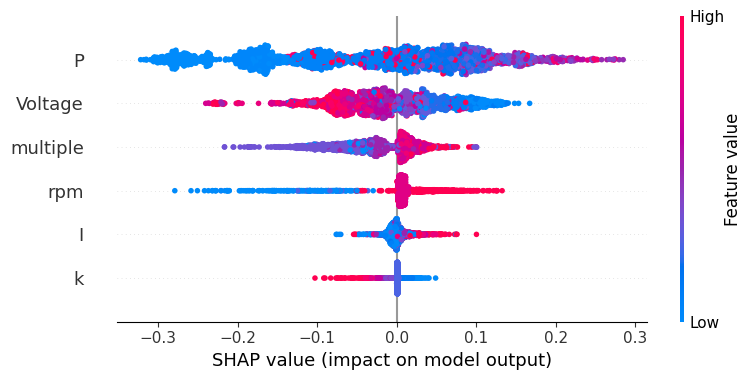

In [8]:
#SHAP
import shap
from sklearn import neighbors
import csv
 
# 指定 CSV 文件的路径
csv_file_path = 'cleaned_file.csv'
 
# 获取表头 1. 打开 CSV 文件
with open(csv_file_path, mode='r', encoding='utf-8') as csv_file:
    # 2. 创建一个 csv.reader 对象
    csv_reader = csv.reader(csv_file)
    
    # 3. 读取表头（第一行）
    header = next(csv_reader)
    
    # (4. 打印表头列表)
    print(header)


khh=neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
khh.fit(X_train, y_train)
X_train_summary=shap.kmeans(X_train,10)
explainer = shap.KernelExplainer(khh.predict, X_train_summary)
shap_test = explainer(X_test)
print(f"Shap values length: {len(shap_test)}\n")
print(f"Sample shap value:\n{shap_test[0]}")
shap.summary_plot(shap_test, feature_names=header)

In [7]:
import csv
 
# 指定 CSV 文件的路径
csv_file_path = 'cleaned_file.csv'
 
# 打开 CSV 文件
with open(csv_file_path, mode='r', encoding='utf-8') as csv_file:
    # 创建一个 csv.reader 对象
    csv_reader = csv.reader(csv_file)
    
    # 读取表头（第一行）
    header = next(csv_reader)
    
    # 打印表头列表
    print(header)

['Voltage', 'multiple', 'k', 'rpm', 'P', 'I', 'Stop Duration']


3


/tmp/ipykernel_79619/4203077706.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(x, y, z, cmap='Greens')


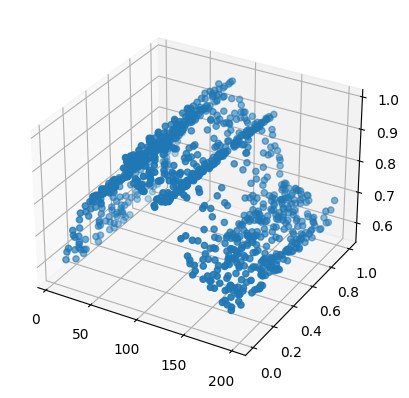

In [55]:
#%matplotlib inline
#import matplotlib.pyplot as plt

#from mpl_toolkits import mplot3d
#ax = plt.axes(projection='3d')
#ax.scatter3D(x, y, z, cmap='Greens')

In [13]:
a = np.where(z == min(z))
print(a,min(z))
print(result[a])

(array([9], dtype=int64),) 0.38670203500266653
[[701.03210827  20.           5.          64.25966048 135.00024346
    0.93028218]]


In [86]:
print(V[a[0]],rpm[a[0]],P[a[0]],I[a[0]])

[777.99176642] [60.59719902] [5.10078749] [0.02209292]
